In [1]:
import pandas as pd
from sqlalchemy import create_engine
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
engine = create_engine("postgresql:///opportunity_youth")

In [3]:
df_oy = pd.read_sql(sql="SELECT * FROM table_final_query_1", con=engine)
df_oy

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "table_final_query_1" does not exist
LINE 1: SELECT * FROM table_final_query_1
                      ^

[SQL: SELECT * FROM table_final_query_1]
(Background on this error at: http://sqlalche.me/e/f405)

In [81]:
df_oy_new = df_oy.pivot(index='pop', columns='age_group', values=['est','total','pct'])
df_oy_new

est                      total                    \
age_group                16-18    19-21    22-24    16-18    19-21    22-24   
pop                                                                           
oy_no                 27,877.0 20,184.0 23,781.0 30,141.0 25,486.0 30,256.0   
oy_yes                 1,815.0  3,902.0  4,897.0 30,141.0 25,486.0 30,256.0   
working w/o a diploma    449.0  1,400.0  1,578.0 30,141.0 25,486.0 30,256.0   

                        pct              
age_group             16-18 19-21 22-24  
pop                                      
oy_no                  92.5  79.2  78.6  
oy_yes                  6.0  15.3  16.2  
working w/o a diploma   1.5   5.5   5.2

In [82]:
df_oy_new.rename(index={'oy_no':'Not an Opportunity Youth', 'oy_yes':'Opportunity Youth','working w/o a diploma':'Working without a diploma'})

est                      total           \
age_group                    16-18    19-21    22-24    16-18    19-21   
pop                                                                      
Not an Opportunity Youth  27,877.0 20,184.0 23,781.0 30,141.0 25,486.0   
Opportunity Youth          1,815.0  3,902.0  4,897.0 30,141.0 25,486.0   
Working without a diploma    449.0  1,400.0  1,578.0 30,141.0 25,486.0   

                                     pct              
age_group                    22-24 16-18 19-21 22-24  
pop                                                   
Not an Opportunity Youth  30,256.0  92.5  79.2  78.6  
Opportunity Youth         30,256.0   6.0  15.3  16.2  
Working without a diploma 30,256.0   1.5   5.5   5.2

In [83]:
df_oy_pct = df_oy_new['pct']
df_oy_pct

age_group,16-18,19-21,22-24
pop,,,
oy_no,92.5,79.2,78.6
oy_yes,6.0,15.3,16.2
working w/o a diploma,1.5,5.5,5.2


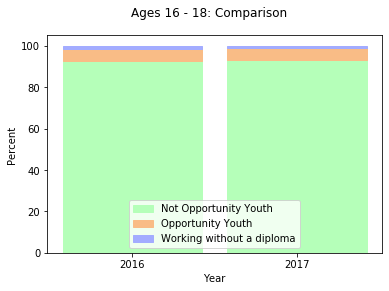

In [114]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '16-18'], 93], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '16-18'], 6],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','16-18'], 1]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 16 - 18: Comparison")
 
# Show graphic

plt.legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower center')
plt.show()


In [115]:
df_oy_new['Totals'] = df_oy_new.sum(axis=1)
df_oy_new.to_csv("data/processed/OY_Status_by_Age.csv", index=True)

In [116]:
df_oy_new.to_excel("data/processed/OY_Status_by_Age.xlsx")

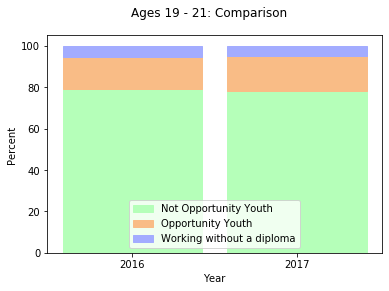

In [118]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '19-21'], 78], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '19-21'], 17],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','19-21'], 5]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 19 - 21: Comparison")
 
# Show graphic

plt.legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower center')
plt.show()


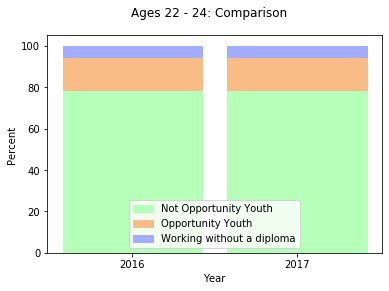

In [133]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '22-24'], 78.5], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '22-24'], 16],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','22-24'], 5.5]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 22 - 24: Comparison")
plt.legend((p1[0], p2[0], p3[0]), 
           ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), 
           loc='lower center') 

# Show graphic
plt.show()


In [134]:
df_oy_est = df_oy_new['est']
df_oy_est

age_group,16-18,19-21,22-24
pop,,,
oy_no,"27,877.0","20,184.0","23,781.0"
oy_yes,"1,815.0","3,902.0","4,897.0"
working w/o a diploma,449.0,"1,400.0","1,578.0"


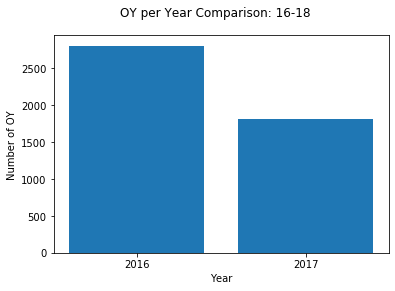

In [145]:
x = np.arange(2)
y1 = [2805, df_oy_est.loc['oy_yes', '16-18']]



fig, ax = plt.subplots()
plt.bar(x, y1)
plt.xticks(x, ('2016', '2017'))
plt.suptitle('OY per Year Comparison: 16-18')
plt.xlabel('Year')
plt.ylabel('Number of OY')
plt.show()

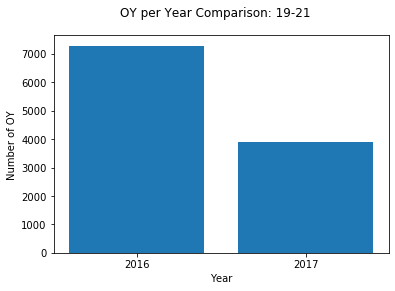

In [146]:
x = np.arange(2)
y2 = [7284, df_oy_est.loc['oy_yes', '19-21']]

fig, ax = plt.subplots()
plt.bar(x, y2)
plt.xticks(x, ('2016', '2017'))
plt.suptitle('OY per Year Comparison: 19-21')
plt.xlabel('Year')
plt.ylabel('Number of OY')
plt.show()

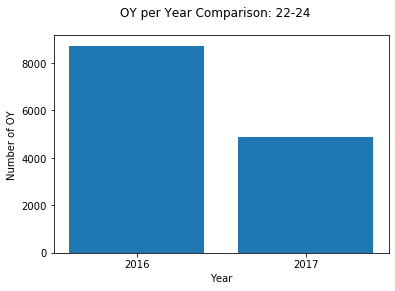

In [147]:
x = np.arange(2)
y3 = [8728, df_oy_est.loc['oy_yes', '22-24']]

fig, ax = plt.subplots()
plt.bar(x, y3)
plt.xticks(x, ('2016', '2017'))
plt.suptitle('OY per Year Comparison: 22-24')
plt.xlabel('Year')
plt.ylabel('Number of OY')
plt.show()

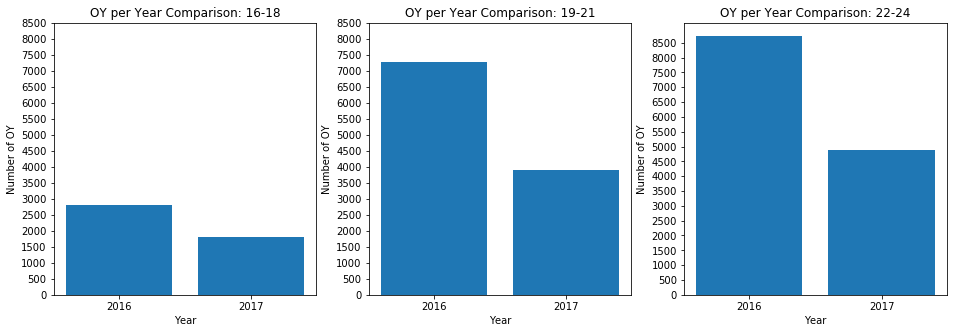

In [241]:
x = np.arange(2)
y1 = [2805, df_oy_est.loc['oy_yes', '16-18']]
y2 = [7284, df_oy_est.loc['oy_yes', '19-21']]
y3 = [8728, df_oy_est.loc['oy_yes', '22-24']]
y = [y1, y2, y3]
t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
ax[0], ax[1], ax[2] = ax.flatten()
for i in np.arange(3):
    ax[i].bar(x, y[i])
    ax[i].set_xticks([0,1])
    ax[i].set_yticks(np.arange(0,9000,500))
    ax[i].set_xticklabels(['2016','2017'])
    ax[i].set_title(t[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of OY')


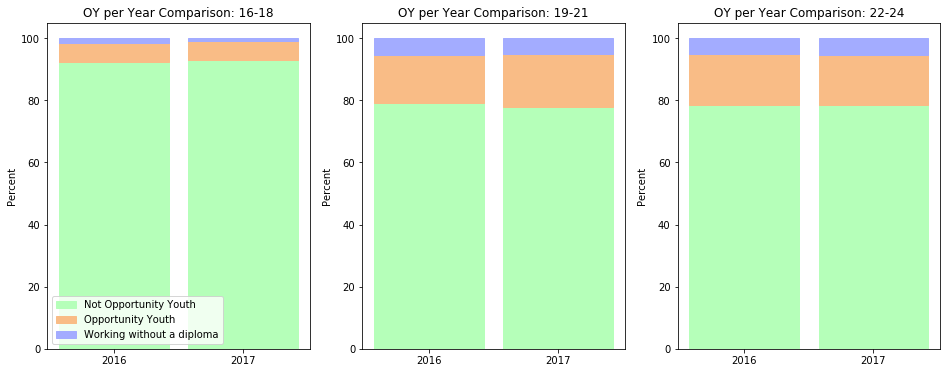

In [239]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data_1 = {'greenBars': [df_oy_pct.loc['oy_no', '16-18'], 93], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '16-18'], 6],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','16-18'], 1]
           }

raw_data_2 = {'greenBars': [df_oy_pct.loc['oy_no', '19-21'], 78], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '19-21'], 17],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','19-21'], 5]
           }

raw_data_3 = {'greenBars': [df_oy_pct.loc['oy_no', '22-24'], 78.5], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '22-24'], 16],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','22-24'], 5.5]
           }

raw_data = [raw_data_1, raw_data_2, raw_data_3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0], ax[1], ax[2] = ax.flatten()
t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];


for data in range(3):
    df = pd.DataFrame(raw_data[data])

    # # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

    # plot
    barWidth = 0.85
    names = ('2016','2017')

    # Create green Bars
    p1 = ax[data].bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
    # Create orange Bars
    p2 = ax[data].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
    # Create blue Bars
    p3 = ax[data].bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)

    # Custom x axis
    ax[data].set_xticks([0,1])
    ax[data].set_xticklabels(['2016','2017'])
    ax[data].set_ylabel('Percent')
    ax[data].set_title(t[data])

# Show graphic

ax[0].legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower left')
plt.show()
